# What and Why LDA

LDA is a **supervised classification technique** that is considered a part of crafting competitive machine learning models. This category of dimensionality reduction is used in areas like image recognition and predictive analysis in marketing.


**Why LDA Over Logistic Regression**
**Two-class problems** – Logistic Regression is traditionally used for two-class and binary classification problems. Though it can be extrapolated and used in multi-class classification, this is rarely performed. On the other hand, Linear Discriminant Analysis is considered a better choice whenever multi-class classification is required and in the case of binary classifications, both logistic regression and LDA are applied.

**Unstable with Well-Separated classes** – Logistic Regression can lack stability when the classes are well-separated. For example, where classes are well separated, the LR coefficients tend to go to infinity.  This is where LDA comes in; since it does not suffer from this problem.

**Unstable with few examples** – If there are few examples(n is small) from which the parameters are to be estimated, logistic regression becomes unstable. However, Linear Discriminant Analysis is a better option because it tends to be stable even in such cases.


***Also, LDA gives nice low-dimension view of the data***

LDA is a generative classification method; in which it implements the Bayes' Rule for calculating the posterior probabilities of the classes using prior(π) and density(mass for qualitative) functions (f)

It is called Linear because the discriminant function is linear in x(variables). This is achieved by assuming - normal(gaussian) distribution of variables and same covariance in each class. (other assumptions include that features are statistically independent)

Recall the Bayes' Rule:

Pr(Y=k|X=x) = $π_k$.$f_k(x)$/$\sum_{l=1}^{l=K}$$π_l$.$f_l(x)$

we plug the gaussian densities and estimated values of prior, mean and variances to calculate the discriminant function; which comes out in the form of

$\delta(x)$ = x. ($µ_k$/$\sigma^2$) - $µ_k^2$/2$\sigma^2$ + log($π_k$)


# How does it works

The objective of LDA is to maximize the separation between two classes.And LAD achieves this by maximizing the ratio of between-class variance and within-class variance($S_b$.$S_w^-1$). LDA creates new discriminant axes hence remedying the 'curse of dimensionality' by reducing the original dimensions to a far less no of transformed dimension in which data is well represented by retaining most of the variance.

The key-steps in the algorithm are:

1. Standardize the d-dimensional dataset.
2. For each class,compute the d-dimensional mean vector 
3. Construct the between class ($S_b$) scatter matrix and within class ($S_w$) scatter matrix.
4. Compute the eigen vector and corresponding eigen values of the matrix ($S_b$.$S_w^-1$)
5. Choose k eigen vectors that correspond to k-largest eigen values to construct dxk dimensional transformation matrix(W) - new feature subspace.
6. Project the sample space (nxd) onto the new feature subspace (W) using X.W; (nxk dimension)


# Brief Mathematical Background

Bayesian Rule states the posterior probability: 


Pr(Y=k|X=x) = $π_k$.$f_k(x)$/$\sum_{l=1}^{K}$$π_l$.$f_l(x)$

Where,
1. π is prior probability of class k (P(Y=k))
2. $f_k(x)$ is density function in class k

For LDA, we choose $f_k(x)$ as Gaussian distribution and same covariance across all classes

*by choosing different $f_k(x)$; we can achieve different kinds of classifiers like: QDA, Naïve Bayes' Classifier*

Note: if we forego same covariance matrix condition; we get a quadratic function of x and this classifier is known as **QDA**

But this becomes tedious in case of large number of feature (covariance matrix is $p^2$ degree); so if we assume, features are conditionally independent in each class; we get a diagonal covariance matrix (p degree) since we can write the density function as a product of densities:
$f_k(x)$ = $\prod_{j=1}^{p}$$f_{j_{k}}$($x_j$)

This is called **Naïve Bayes' Classifier**



# Suggestions
Some suggestions you should keep in mind while preparing the data to build the LDA model:

**LDA is mainly used in classification problems where you have a categorical output variable. It allows both binary classification and multi-class classification.**

The standard LDA model makes use of the Gaussian Distribution of the input variables. **You should check the univariate distributions of each attribute and transform them into a more Gaussian-looking distribution. For example, for the exponential distribution, use log and root function and for skewed distributions use BoxCox.**


**Outliers can skew the primitive statistics used to separate classes in LDA, so it is preferable to remove them.**

**Since LDA assumes that each input variable has the same variance, it is always better to standardize your data before using an LDA model. Keep the mean to be 0 and the standard deviation to be 1.**

In [27]:
import pandas as pd
import numpy as np

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)

In [51]:
y = df_wine.iloc[:, 0]
X = df_wine.iloc[:, 1:]

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [52]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [33]:
np.set_printoptions(precision = 4)
mean_vecs = []
#class wise mean vectors of features

for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis = 0))
    print('MV %s: %s\n' %(label, mean_vecs[label-1]))

MV 1: [ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]

MV 2: [-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016]

MV 3: [ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912]



**Using the mean vectors, we can now compute the within-class scatter matrix $S_w$**

$S_w$ = $\sum_{i=1}^{c}$$S_i$

This is calculated by summing up the individual scatter matrics $s_i$ of each individual class i:

$S_i$ = $\sum_{x\in D_i}^{c}$ $(x-m_i)$ . $(x-m_i)^T$

In [36]:
d = 13

#check how to find number of columns in X

S_w = np.zeros((d,d))

for label, mv in zip(range(1,4), mean_vecs):
    class_scatter = np.zeros((d,d))
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d,1), mv.reshape(d,1)
        class_scatter += (row-mv).dot((row-mv).T)
        
    S_w += class_scatter

        


In [39]:
S_w[0]

array([51.451 ,  0.6703, -2.0626, -3.4724,  4.8439,  9.0902,  5.6869,
       -2.4125,  1.1081, 18.6567,  1.6244, -1.1247,  5.5666])

However, a big assumption in this calculation is that class labels are uniformly distributed. But we know it is not the case

In [43]:
np.bincount(y_train)[1:]


array([40, 49, 35])

To remedy this, we need to scale individual $S_i$. This is same as computing the covariance matrix

$∑_i$ = 1/$N_i$ . $\sum_{x\in D_i}^{c}$ $(x-m_i)$.$(x-m_i)^T$

Here, $∑_i$ is the covariance matrix

In [44]:
d = 13

#check how to find number of columns in X

S_w = np.zeros((d,d))

for label, mv in zip(range(1,4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_w += class_scatter


In [45]:
S_w[0]

array([ 1.2458,  0.0514, -0.0329, -0.0895,  0.1155,  0.2454,  0.1501,
       -0.0557,  0.0991,  0.4879,  0.0238, -0.007 ,  0.1342])

**Between-class scatter matrix $S_b$**

$S_b$ = $\sum_{i=1}^{c}$$N_i$.$(m_i - m)$ $(m_i-m)^T$

Here, m is the overall mean that is computed, including samples from all the classes

In [56]:
for i, mean_vec in enumerate(mean_vecs):
    print(i, mean_vec)

0 [ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]
1 [-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016]
2 [ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912]


In [59]:
X_train[y_train==(i+1)].shape[0]

40

In [65]:
m = np.mean(X_train_std, axis = 0)

d =13
S_b = np.zeros((d,d))

for i, mean_vec in enumerate(mean_vecs):

    n = X_train_std[y_train==(i+1)].shape[0]
    mean_vec = mean_vec.reshape(d,1)
    mean_overall = m.reshape(d,1)
    S_b += n*(mean_vec - mean_overall).dot((mean_vec-mean_overall).T)

In [66]:
S_b[1]

array([ 10.1509,  39.0069,  15.3272,  22.8751,   0.4806, -39.5667,
       -51.7325,  31.3465, -32.6026,  44.4773, -50.8565, -55.7604,
       -13.8346])

**computing $S_b. S_w^-1$**

In [106]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_w).dot(S_b))

In [107]:
eigen_vals

array([ 5.6843e-14+0.0000e+00j,  1.5644e+02+0.0000e+00j,
        4.5272e+02+0.0000e+00j,  5.8973e-14+0.0000e+00j,
       -4.0438e-14+0.0000e+00j,  3.4869e-14+0.0000e+00j,
       -1.0147e-14+2.6321e-14j, -1.0147e-14-2.6321e-14j,
        9.2486e-15+4.0513e-15j,  9.2486e-15-4.0513e-15j,
       -7.9359e-15+0.0000e+00j,  2.5762e-16+4.7661e-15j,
        2.5762e-16-4.7661e-15j])

In [108]:
eigen_vecs[:, 1]

array([-0.3797+0.j, -0.2206+0.j, -0.3816+0.j,  0.3018+0.j,  0.0141+0.j,
        0.0234+0.j,  0.1869+0.j,  0.0696+0.j,  0.1796+0.j, -0.284 +0.j,
        0.2349+0.j,  0.073 +0.j, -0.5971+0.j])

In [109]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

In [110]:
eigen_pairs

[(5.684341886080802e-14,
  array([ 0.7783+0.j, -0.1244+0.j, -0.2383+0.j,  0.232 +0.j,  0.0077+0.j,
          0.075 +0.j, -0.0885+0.j,  0.0212+0.j,  0.1323+0.j, -0.1247+0.j,
          0.1259+0.j, -0.055 +0.j, -0.4498+0.j])),
 (156.43636121952343,
  array([-0.3797+0.j, -0.2206+0.j, -0.3816+0.j,  0.3018+0.j,  0.0141+0.j,
          0.0234+0.j,  0.1869+0.j,  0.0696+0.j,  0.1796+0.j, -0.284 +0.j,
          0.2349+0.j,  0.073 +0.j, -0.5971+0.j])),
 (452.7215812449746,
  array([-0.0662+0.j,  0.0386+0.j, -0.0217+0.j,  0.184 +0.j, -0.0034+0.j,
          0.2326+0.j, -0.7747+0.j, -0.0811+0.j,  0.0875+0.j,  0.185 +0.j,
         -0.066 +0.j, -0.3805+0.j, -0.3285+0.j])),
 (5.897276380582688e-14,
  array([ 0.7498+0.j, -0.1433+0.j, -0.3341+0.j,  0.2661+0.j,  0.0181+0.j,
          0.0591+0.j,  0.0261+0.j,  0.0523+0.j,  0.1204+0.j, -0.0579+0.j,
          0.0688+0.j, -0.0508+0.j, -0.4499+0.j])),
 (4.043809485299187e-14,
  array([-0.0943+0.j, -0.4792+0.j,  0.2247+0.j,  0.1469+0.j, -0.0309+0.j,
          0.

In [111]:
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse = True)

In [112]:
eigen_pairs

[(452.7215812449746,
  array([-0.0662+0.j,  0.0386+0.j, -0.0217+0.j,  0.184 +0.j, -0.0034+0.j,
          0.2326+0.j, -0.7747+0.j, -0.0811+0.j,  0.0875+0.j,  0.185 +0.j,
         -0.066 +0.j, -0.3805+0.j, -0.3285+0.j])),
 (156.43636121952343,
  array([-0.3797+0.j, -0.2206+0.j, -0.3816+0.j,  0.3018+0.j,  0.0141+0.j,
          0.0234+0.j,  0.1869+0.j,  0.0696+0.j,  0.1796+0.j, -0.284 +0.j,
          0.2349+0.j,  0.073 +0.j, -0.5971+0.j])),
 (5.897276380582688e-14,
  array([ 0.7498+0.j, -0.1433+0.j, -0.3341+0.j,  0.2661+0.j,  0.0181+0.j,
          0.0591+0.j,  0.0261+0.j,  0.0523+0.j,  0.1204+0.j, -0.0579+0.j,
          0.0688+0.j, -0.0508+0.j, -0.4499+0.j])),
 (5.684341886080802e-14,
  array([ 0.7783+0.j, -0.1244+0.j, -0.2383+0.j,  0.232 +0.j,  0.0077+0.j,
          0.075 +0.j, -0.0885+0.j,  0.0212+0.j,  0.1323+0.j, -0.1247+0.j,
          0.1259+0.j, -0.055 +0.j, -0.4498+0.j])),
 (4.043809485299187e-14,
  array([-0.0943+0.j, -0.4792+0.j,  0.2247+0.j,  0.1469+0.j, -0.0309+0.j,
          0.

In [74]:
from sklearn.datasets import load_wine

In [113]:
eigen_pairs[0][1]

array([-0.0662+0.j,  0.0386+0.j, -0.0217+0.j,  0.184 +0.j, -0.0034+0.j,
        0.2326+0.j, -0.7747+0.j, -0.0811+0.j,  0.0875+0.j,  0.185 +0.j,
       -0.066 +0.j, -0.3805+0.j, -0.3285+0.j])

In [114]:
W = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))

In [115]:
W

array([[-0.0662, -0.3797],
       [ 0.0386, -0.2206],
       [-0.0217, -0.3816],
       [ 0.184 ,  0.3018],
       [-0.0034,  0.0141],
       [ 0.2326,  0.0234],
       [-0.7747,  0.1869],
       [-0.0811,  0.0696],
       [ 0.0875,  0.1796],
       [ 0.185 , -0.284 ],
       [-0.066 ,  0.2349],
       [-0.3805,  0.073 ],
       [-0.3285, -0.5971]])

In [151]:
X_tzrain_lda = X_train_std.dot(W)

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [120]:
colors = ['r','b', 'g']
markers = ['s', 'x', 'v']

In [122]:
for l,c,m in zip(np.unique(y_train), colors, markers):
    print(l, c, m)

1 r s
2 b x
3 g v


In [130]:
X_train_lda[y_train==l]

array([[ 1.7163, -1.8916],
       [ 1.2841, -0.7429],
       [ 1.2725, -0.4089],
       [ 1.8524, -1.4223],
       [ 1.4803, -0.0185],
       [ 1.1625, -0.9774],
       [ 1.937 , -0.8846],
       [ 2.1032, -1.1442],
       [ 1.8019, -1.5348],
       [ 1.4805, -0.2871],
       [ 1.8532, -1.3112],
       [ 1.5293, -0.8615],
       [ 1.6832, -0.7544],
       [ 1.5291, -1.4617],
       [ 0.9811, -0.2384],
       [ 1.8324, -0.3832],
       [ 2.1135, -0.296 ],
       [ 1.772 , -1.3278],
       [ 1.535 , -2.106 ],
       [ 1.2039, -0.7537],
       [ 1.451 , -0.2235],
       [ 1.6856, -0.0465],
       [ 1.4735, -0.4515],
       [ 1.5491, -0.214 ],
       [ 1.5596, -1.1252],
       [ 1.7507, -0.8368],
       [ 1.2892, -0.722 ],
       [ 1.5524, -1.1014],
       [ 1.6834, -1.4079],
       [ 1.8365, -1.2304],
       [ 2.0648, -1.7898],
       [ 1.6739, -1.337 ],
       [ 1.8072, -1.8067],
       [ 1.0562, -0.7634],
       [ 1.6356, -1.8797]])

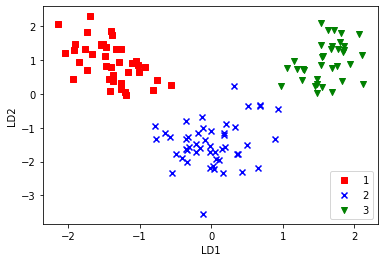

In [157]:
colors = ['r','b', 'g']
markers = ['s', 'x', 'v']
for l,c,m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_tzrain_lda[y_train==l, 0], X_tzrain_lda[y_train==l, 1]*(-1), c = c, label=l, marker = m)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc= 'lower right')
plt.show()

# LDA via scikit-learn

In [134]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [153]:
lda = LinearDiscriminantAnalysis(n_components = 2)

In [154]:
X_train_lda = lda.fit_transform(X_train_std, y_train)

In [170]:
lda.explained_variance_ratio_

array([0.7385, 0.2615])

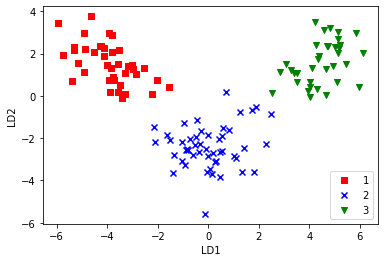

In [156]:
colors = ['r','b', 'g']
markers = ['s', 'x', 'v']
for l,c,m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0], X_train_lda[y_train==l, 1], c = c, label=l, marker = m)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc= 'lower right')
plt.show()

In [159]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution = 0.02):
    markers = ('s', 'x', 'o', 'v', '^')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() +1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y==cl, 0], y = X[y==cl, 1], alpha= 0.8, c = cmap(idx), marker = markers[idx], label= cl)

In [162]:
from sklearn.linear_model import LogisticRegression

In [164]:
lr = LogisticRegression().fit(X_train_lda, y_train)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


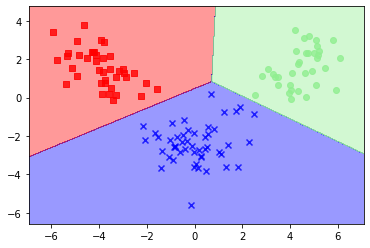

In [167]:
plot_decision_regions(X_train_lda, y_train, classifier = lr)

In [168]:
X_test_lda = lda.transform(X_test_std)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


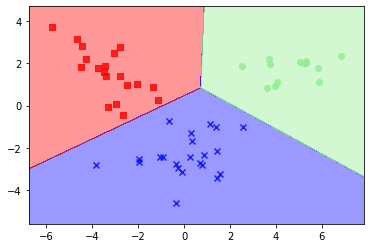

In [169]:
plot_decision_regions(X_test_lda, y_test, classifier = lr)